In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib
matplotlib.use('TkAgg')
#%matplotlib inline
import BPV
import pattern_manipulation as pm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import pickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
Wmin = 0.001
Wmax = 0.2
Wnsteps = 5
Wstep = (Wmax - Wmin)/Wnsteps
Wrange = np.arange(Wmin,Wmax,Wstep)

Nmin = 10
Nmax = 150
Nnsteps = 5
Nstep = (Nmax - Nmin)/Nnsteps
Nrange = np.arange(Nmin,Nmax,Nstep)

nproblems = Wnsteps*Nnsteps

data = BPV.Data()
data.read_csv("p.delviva.csv",False)
data.df.sort_index(by="p",inplace=True,ascending=True)
data.df.set_index(pd.Index([j for j in range(len(data.df))]), inplace=True)

entropies = np.zeros((Wnsteps, Nnsteps))
rates = np.zeros((Wnsteps, Nnsteps))
cardinalities = np.zeros((Wnsteps, Nnsteps), dtype='int')
indexes = {}

it = 1
for i,j in [(x,y) for x in range(Wnsteps) for y in range(Nnsteps)]:
    print("Solving problem {0} out of {1}".format(it, nproblems))
    W = Wrange[i]
    N = Nrange[j]
    
    prbl_exact = BPV.BPV("pulp",data,N,W,time_solver=False)
    prbl_exact.solve()
    #prbl_exact.pprint_solution()
    
    entropies[i,j] = prbl_exact.solution_entropy
    rates[i,j] = prbl_exact.solution_rate
    cardinalities[i,j] = prbl_exact.solution_cardinality
    indexes[(i,j)] = prbl_exact.solution.index
    it += 1
    
f1 = open("/home/renato/tesi/code/plot6.entropies",r'wb')
f2 = open("/home/renato/tesi/code/plot6.rates",r'wb')
f3 = open("/home/renato/tesi/code/plot6.cardinalities",r'wb')
f4= open("/home/renato/tesi/code/plot6.indexes",r'wb')

pickle.dump(entropies,f1)
pickle.dump(rates,f2)
pickle.dump(cardinalities,f3)
pickle.dump(indexes,f4)


Solving problem 1 out of 25
Solving problem 2 out of 25
Solving problem 3 out of 25
Solving problem 4 out of 25
Solving problem 5 out of 25
Solving problem 6 out of 25
Solving problem 7 out of 25
Solving problem 8 out of 25
Solving problem 9 out of 25
Solving problem 10 out of 25
Solving problem 11 out of 25
Solving problem 12 out of 25
Solving problem 13 out of 25
Solving problem 14 out of 25
Solving problem 15 out of 25
Solving problem 16 out of 25
Solving problem 17 out of 25
Solving problem 18 out of 25
Solving problem 19 out of 25
Solving problem 20 out of 25
Solving problem 21 out of 25
Solving problem 22 out of 25
Solving problem 23 out of 25
Solving problem 24 out of 25
Solving problem 25 out of 25


In [14]:
f1 = open("/home/renato/tesi/code/plot6.entropies",r'rb')
f2 = open("/home/renato/tesi/code/plot6.rates",r'rb')
f3 = open("/home/renato/tesi/code/plot6.cardinalities",r'rb')
f4 = open("/home/renato/tesi/code/plot6.indexes",r'rb')

entropies = pickle.load(f1)
rates = pickle.load(f2)
cardinalities = pickle.load(f3)
indexes = pickle.load(f4)

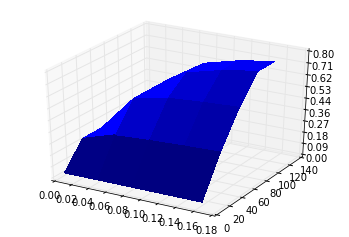

In [15]:
fig = plt.figure()
ax = fig.gca(projection='3d')

X, Y = np.meshgrid(Wrange, Nrange)
#R = np.sqrt(X**2 + Y**2)
#Z = np.sin(R)
Z= entropies
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
        linewidth=0, antialiased=False)
#ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

#fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()